## Abstract/Introduction

When recieving and digitizing a cosmic signal using a radio telescope, it is important to be able to accurately capture the underlying waveform. Modern radio astronomy relies on the digitization of electromagnetic signals using finite sampling rates and sample rate- limiting filters. These create limitations and require careful attention to effects that may happen while sampling. One effect in particular is aliasing, which can cause signals to appear at incorrect frequencies if the sampling rate is insufficient or if filtering is imperfect. Understanding aliasing is therefore essential to interpret and understand this type of data.

In this project, we investigate how the observed characteristics of a sinusoidal signal change as the input frequency is varied across multiple Nyquist zones. Using a signal generator, an SDR anti-aliasing bandpass filter, a Raspberry Pi and the most elite Python programming skills, we record sinusoidal input signals spanning across several Nyquist zones. We analyze this data using Python to construct voltage and power spectra, autocorrelation functions, and oversampled discrete Fourier transforms.

Our primary goal is to determine how accurately the measured alias frequency matches theoretical predictions as the input signal frequency is swept across those different Nyquist zones. We analyze these data using numerical tools in Python to construct voltage spectra, power spectra, and autocorrelation functions (ACFs). We compare measured alias frequencies and spectral features with expectations from Nyquist sampling theory and the convolution theorem, and we examine how filtering and windowing influence the observed spectra. Noise properties are analyzed through power spectra and autocorrelation functions, providing a framework for understanding radiometric sensitivity. Finally, we demonstrate the operation of double-sideband and single-sideband mixing and discuss their importance in practical radio receivers.

Beyond aliasing, this project also situates these measurements within the broader context of radio astronomy instrumentation. We discuss the role of filtering, noise, and heterodyne mixing (including double-sideband (DSB) and single-sideband (SSB) mixers) in shaping observed spectra. Together, these analyses provide a quantitative demonstration of how digital sampling theory applies in practice and why careful signal processing is critical for astronomical observations.


## Background and theory

<span style="font-size: 1.5em; color: maroon;">
Nyquist Criterion:
</span>

A continuous-time signal sampled at a rate $\nu_s$ can be reconstructed without ambiguity only if its bandwidth satisfies the Nyquist criterion,
\[
$\nu_{\mathrm{in}} < \frac{\nu_s}{2}.
$\]
The frequency $\nu_s/2$ is known as the Nyquist frequency. If a signal contains frequency components above this limit, those components are misrepresented in the sampled data through a process known as aliasing.

<span style="font-size: 1.5em; color: maroon;">
Aliasing Frequencies:
</span>

For an input frequency $\nu_0$, the observed alias frequency $\nu_a$ is given by $\nu_a = \left| \nu_0 - n \nu_s \right|,$
where $n$ is an integer chosen such that $\nu_a \le \nu_s/2$. This relation describes how higher-frequency signals are folded back into the observable frequency range when the sampling rate is insufficient.


<span style="font-size: 1.5em; color: maroon;">
Fourier Transforms and the Discrete Fourier Transform
</span>

The Fourier transform maps a time-domain signal $f(t)$ into the frequency domain,
\[
$\tilde{f}(\nu) = \int f(t) e^{-2\pi i \nu t} \, dt,
$\]
where $\tilde{f}(\nu)$ is generally complex-valued. In digital systems, the signal is sampled at discrete times, and integrals are replaced by sums, yielding the Discrete Fourier Transform (DFT).

<span style="font-size: 1.5em; color: maroon;">
Voltage Spectra, Power Spectra, and Autocorrelation Functions
</span>

The voltage spectrum $\tilde{f}(\nu)$ preserves both amplitude and phase information and is complex-valued. The power spectrum,
\[
$P(\nu) = |\tilde{f}(\nu)|^2,
$\]
is real-valued and describes how signal power is distributed across frequencies.

The autocorrelation function (ACF) measures the similarity of a signal with a time-shifted version of itself,
\[
$A(\tau) = \langle f(t) f(t+\tau) \rangle.
$\]
The correlation theorem states that the Fourier transform of the ACF is equal to the power spectrum. In practice, finite sampling introduces edge effects and circular correlations, which can be mitigated through zero-padding.

<span style="font-size: 1.5em; color: maroon;">
Spectral Leakage and Frequency Resolution
</span>

In practice, signals are observed over a finite time interval. This is equivalent to multiplying the true signal by a rectangular window in time. By the convolution theorem, this multiplication corresponds to convolution in the frequency domain, causing power from a single frequency to spread into neighboring frequencies.

This effect, known as spectral leakage, becomes apparent when power spectra are plotted on a logarithmic scale or when the spectrum is evaluated at frequencies much finer than the FFT bin spacing. The finite observation time also limits the achievable frequency resolution, with narrower spectral features requiring longer integration times.

<span style="font-size: 1.5em; color: maroon;">
Noise
</span>

Radio receivers measure the power of a signal and sometimes see what appears as random fluctuations in the data. This is not noise. Noise is a fluctuation in a measured electric field of a signal that can be described by Gaussian statistics. Thermal noise sources, including receiver noise and blackbody emission, are characterized by an effective temperature. 

In the Rayleigh–Jeans limit $(h\nu \ll kT)$, the brightness of a blackbody is proportional to temperature, implying that noise power depends linearly on temperature. In radio astronomy, this translated to brightness temperature $T_B$, which allows noise power from both thermal and non-thermal sources to be described using a common temperature scale.

<span style="font-size: 1.5em; color: maroon;">
Mixing and Sidebands
</span>

Mixers are fundamental components of radio receivers that shift the frequency of signals by multiplying them with a local oscillator (LO). These frequency of these signals are usually to high and need to be decreased to a manageable level that the processor can intake. There are two types of mixers we explore in this report a double-sideband (DSB) mixer and a single-sideband (SSB) mixer.

If the input signal is $f_{\mathrm{sig}}(t) = \cos(2\pi \nu_{\mathrm{RF}} t)$ and the local oscillator is $f_{\mathrm{LO}}(t) = \cos(2\pi \nu_{\mathrm{LO}} t)$, the mixer output is their product. Using trigonometric identities, this multiplication produces two frequency components at $\nu_{\mathrm{RF}} = \nu_{\mathrm{LO}} \pm \Delta\nu$, where $\Delta\nu = |\nu_{\mathrm{RF}} - \nu_{\mathrm{LO}}|$.

In a double-sideband (DSB) mixer, both the upper and lower sidebands are present simultaneously. As a result, a signal at $\nu_{\mathrm{RF}} = \nu_{\mathrm{LO}} + \Delta\nu$ and a signal at $\nu_{\mathrm{RF}} = \nu_{\mathrm{LO}} - \Delta\nu$ produce identical output frequencies after mixing. This symmetry means that DSB mixers cannot disti"nguish whether an observed signal originated above or below the LO frequency, leading to ambiguity in the recovered RF spectrum.

In contrast, single-sideband (SSB) mixing preserves phase information by separating the signal into in-phase (I) and quadrature (Q) components. This allows positive and negative frequency offsets relative to the LO to be distinguished, such that either $\nu_{\mathrm{RF}} = \nu_{\mathrm{LO}} + \Delta\nu$ or $\nu_{\mathrm{RF}} = \nu_{\mathrm{LO}} - \Delta\nu$ can be isolated while the other is suppressed. This distinction is critical in modern radio astronomy, where accurate frequency identification and filtering are required prior to digitization and spectral analysis.

## Experimental Setup and Data Collection (Part 1)

A sinusoidal input signal was generated using a signal generator and sampled using an SDR connected to a Raspberry Pi. The SDR was operated in direct sampling mode, bypassing the internal tuner, with a fixed sampling frequency of $\nu_s = 1~\mathrm{MHz}$ and a fixed amplitude of $2.5~\mathrm{mV}$.

Various signal frequencies were swept across 4 different nyquist zone. For a fixed sample frequency of $\nu_s = 1~\mathrm{MHz}$, Zone 0 is characterized by input signal frequencies between $100-500~\mathrm{kHz}$ (the only zone that is within the nyquist criterion). Zone 1 contains $\nu_{\mathrm{in}} = 500-1000~\mathrm{kHz}$, Zone 2 containing $\nu_{\mathrm{in}} = 1000-1500~\mathrm{kHz}$, and Zone 3 containing $\nu_{\mathrm{in}} = 1500-2000~\mathrm{kHz}$.

Data was collected for 3 evenly spaced signal frequencies in each Nyquist zone. Nyquist zone 0 is the only zone of which the signal frequencies obey the nyquist criterion, so we predict that we should experience aliasing for all other zones. In order to see aliasing, the anti-aliasing bandpass filter in the SDR was turned off by changing the FIR coefficients in the digital recieving code. An array of zeros ensured that the filter did not interact with the incoming signal. For each input frequency, data was recorded and saved as NumPy arrays for offline analysis. All subsequent data processing and visualization were performed using custom Python scripts and functions developed for this project.

Later on in the experiment, the bandpass filter was turned back on by eliminating the change in FIR coefficients in the intake and we recollected our data (12 arrays at different signal frequencies across varying nyquist zones) to compare to the existing data in order to characterize the bandpass filter.

Even later on, more data was collected using two signal generators and a power splitter in reverse, to investigate frequency resolution. One signal generator was set at 250kHz as a default while the other signal generator was varies relative to the first. The frequency separation between the two signals was set to Δν = 10 kHz, 1 kHz, 0.5 kHz, and 0.25 kHz to test how closely spaced two frequencies can be before they are no longer distinguishable in the Fourier domain. To further explore the dependence of frequency resolution on data length, the number of samples we used in the FFT was varied for the Δν = 0.5 kHz case. By holding the sampling rate constant and changing N, we analyzed how the FFT frequency bin width affected the ability to resolve closely spaced tones.

Lastly, broadband noise data were collected using the laboratory noise generator, which produces random voltage fluctuations via a noise diode. The noise signal was sampled at a rate of $\nu_s = 3000~\mathrm{kHz}$ and recorded in 16 independent data blocks. These blocks were used to study the statistical properties of noise and to test the radiometer equation by comparing the noise fluctuations of individual power spectra to those obtained by averaging multiple blocks.

## Experiment 1: Data

<span style="font-size: 1.5em; color: maroon;">
Time-Domain Signals and Nyquist Sampling
</span>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import package as pk

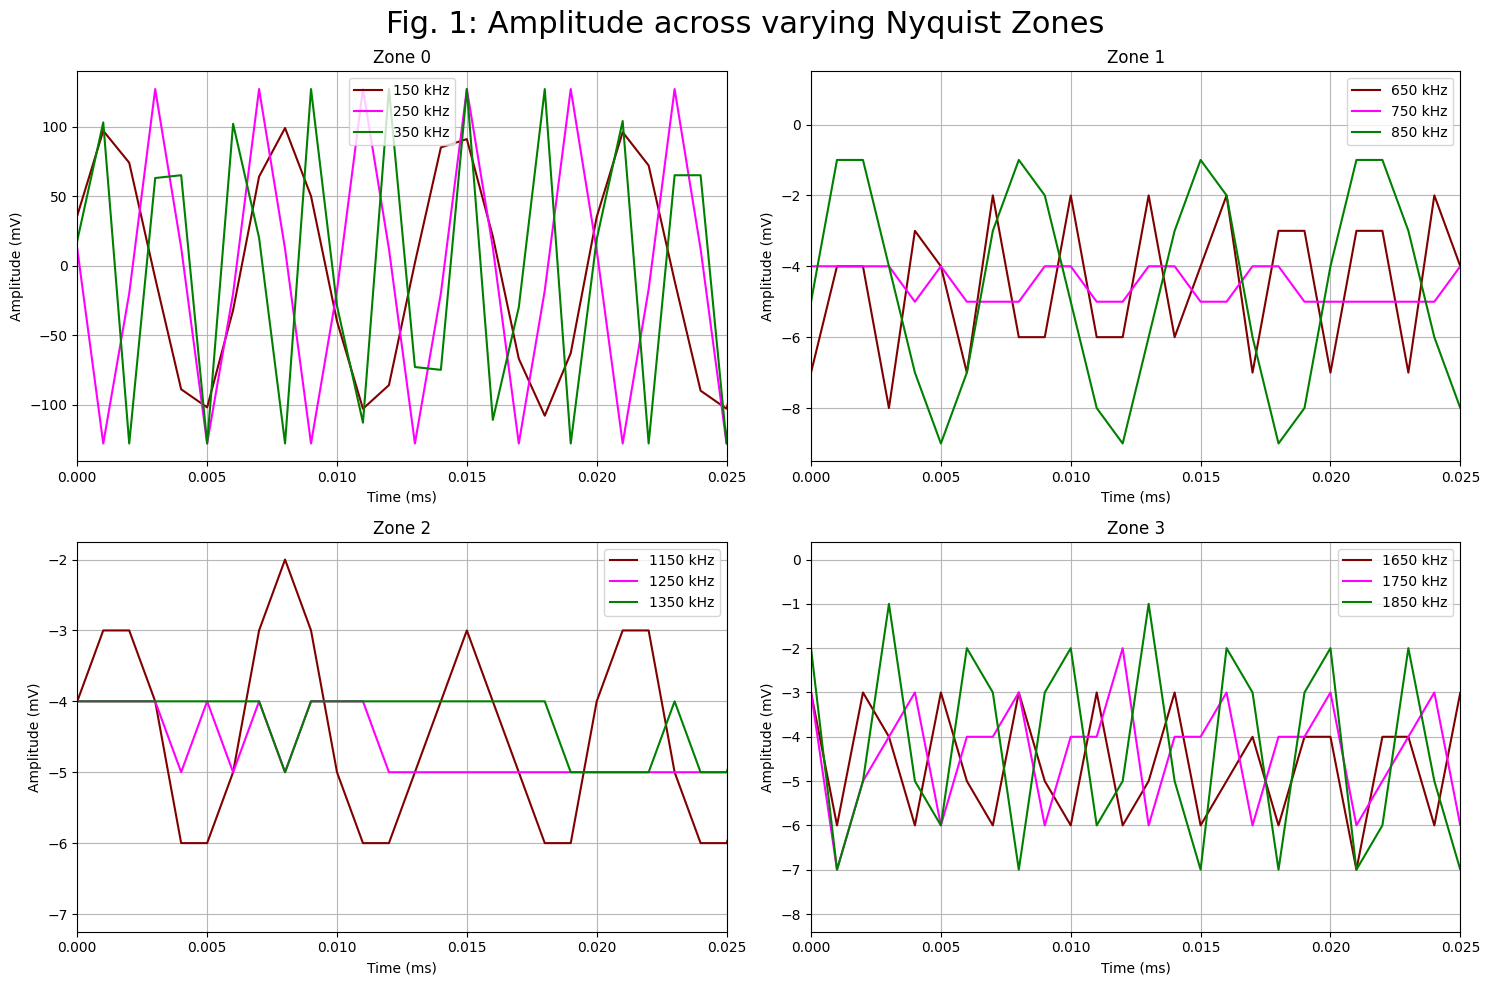

In [2]:
''' Sample Frequency: Vs = 1MHz (1000kHz), Amplitude = 2.5 MHz'''
'''loading data and adding time'''

#plotting figures
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(pk.t_z01, pk.arr_z01[1],color = 'maroon', label="150 kHz")
axs[0, 0].plot(pk.t_z02, pk.arr_z02[1],color = 'magenta', label="250 kHz")
axs[0, 0].plot(pk.t_z03, pk.arr_z03[1],color = 'green', label="350 kHz")
axs[0, 0].set_title('Zone 0')

axs[0, 1].plot(pk.t_z11, pk.arr_z11[1],color = 'maroon', label="650 kHz")
axs[0, 1].plot(pk.t_z12, pk.arr_z12[1],color = 'magenta', label="750 kHz")
axs[0, 1].plot(pk.t_z13, pk.arr_z13[1],color = 'green', label="850 kHz")
axs[0, 1].set_title('Zone 1')

axs[1, 0].plot(pk.t_z21, pk.arr_z21[1],color = 'maroon', label="1150 kHz")
axs[1, 0].plot(pk.t_z21, pk.arr_z22[1],color = 'magenta', label="1250 kHz")
axs[1, 0].plot(pk.t_z23, pk.arr_z23[1],color = 'green', label="1350 kHz")
axs[1, 0].set_title('Zone 2')

axs[1, 1].plot(pk.t_z31, pk.arr_z31[1],color = 'maroon', label="1650 kHz")
axs[1, 1].plot(pk.t_z32, pk.arr_z32[1],color = 'magenta', label="1750 kHz")
axs[1, 1].plot(pk.t_z33, pk.arr_z33[1],color = 'green', label="1850 kHz")
axs[1, 1].set_title('Zone 3')

#applying limits to all subplots
for ax in axs.ravel():
    ax.set_xlim(0, .025)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Amplitude (mV)')
    ax.legend()
    ax.grid(True, alpha=.9)

fig.suptitle('Fig. 1: Amplitude across varying Nyquist Zones', fontsize =22)
fig.tight_layout()
plt.show()

Fig. 1- Amplitude over time for sinusoidal input signals sampled at $\nu_s = 1~\mathrm{MHz}$ across multiple Nyquist zones. As the signal frequency increases over each zone, most of the data remains relatively sinusoidal. The amplitude measurements from frequencies below the Nyquist frequency (Zone 0) measure out to the 100s. As soon as the input frequency increases beyond $\nu_s/2$, the amplitude drops by a steep amount to negative levels.

In terms of waveform, most of the data appears more-or-less sinusoidal. What differs are the signals produced from input frequencies at $\nu_s = 750, 1250, 1350~\mathrm{kHz}$. Although we performed many trials collecting this data, each time the waveforms came out being not sinusoidal. This is likely because of mechanical issues with the signal generator. In the future, if we had more time, we would retake our data at an increased amplitude for Zones 1-3.

Despite these three flukes, the rest of the data appears to be sinusoidal. In theory, aliasing should not differ much in terms of sinusoidal waveform, so most of our data matches up with theory. This shows that aliasing cannot be seen from just the waveform alone and we dive deeper in our analysis with plots that are not so time-domain dependent.

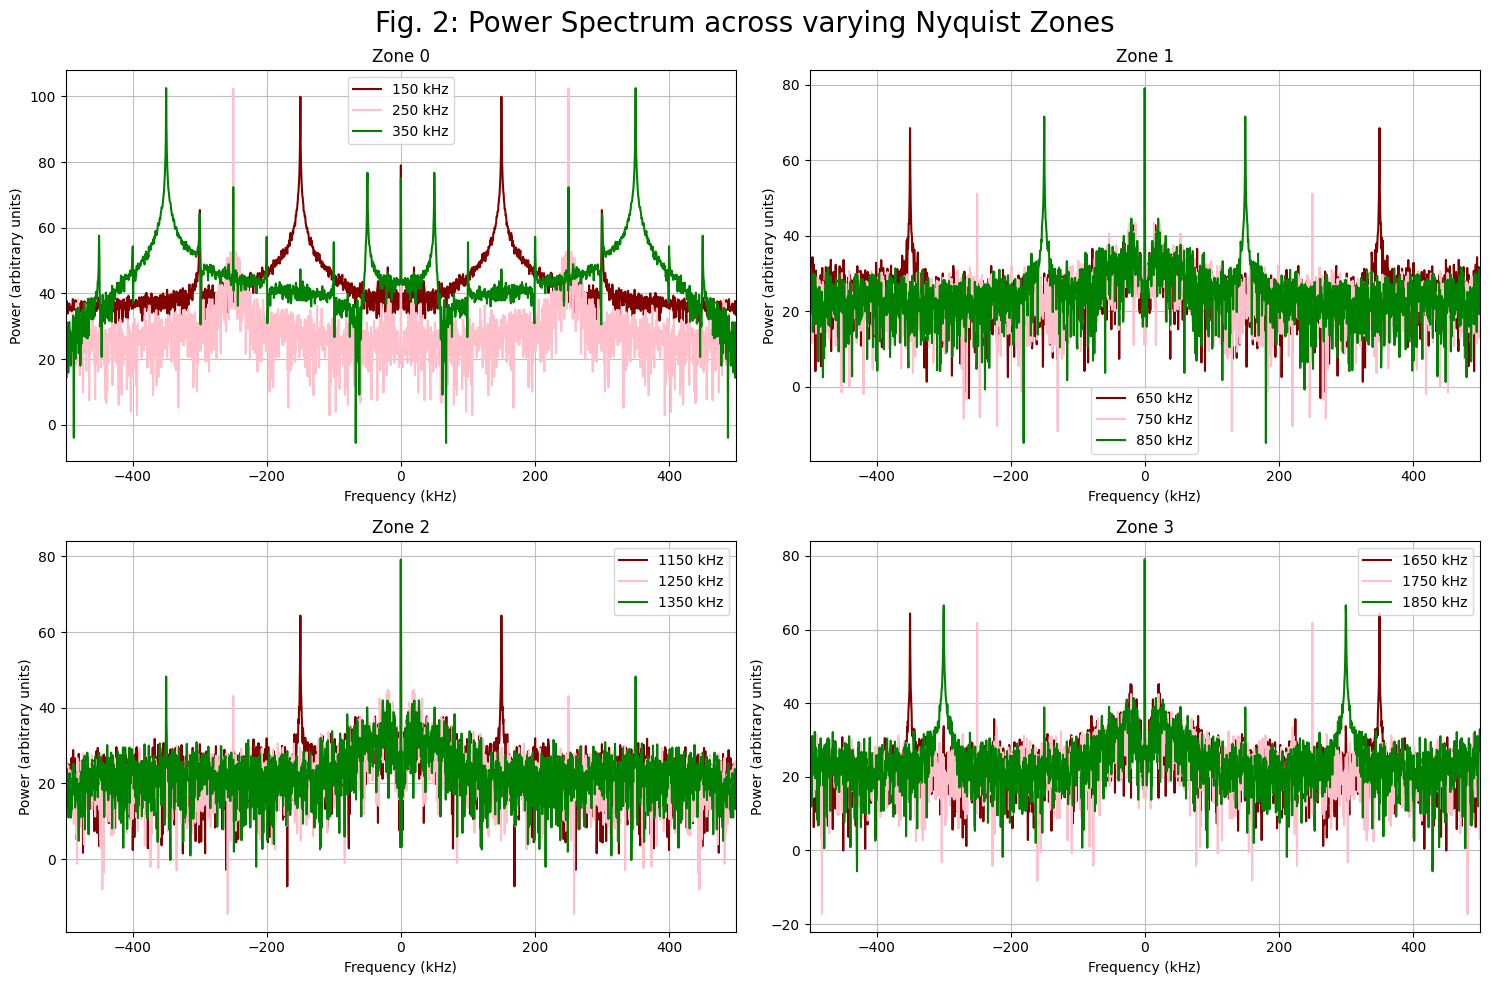

In [55]:
# Power spectra in 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
colors = ["maroon", "pink", "green"]

# Zone 0
axs[0,0].plot(pk.freq_shift/1e3, 10*np.log10(pk.P_z01), color=colors[0], label="150 kHz")
axs[0,0].plot(pk.freq_shift/1e3, 10*np.log10(pk.P_z02), color=colors[1], label="250 kHz")
axs[0,0].plot(pk.freq_shift/1e3, 10*np.log10(pk.P_z03), color=colors[2], label="350 kHz")
axs[0,0].set_title("Zone 0")

# Zone 1
axs[0,1].plot(pk.freq_shift/1e3, 10*np.log10(pk.P_z11), color=colors[0], label="650 kHz")
axs[0,1].plot(pk.freq_shift/1e3, 10*np.log10(pk.P_z12), color=colors[1], label="750 kHz")
axs[0,1].plot(pk.freq_shift/1e3, 10*np.log10(pk.P_z13), color=colors[2], label="850 kHz")
axs[0,1].set_title("Zone 1")

# Zone 2
axs[1,0].plot(pk.freq_shift/1e3, 10*np.log10(pk.P_z21), color=colors[0], label="1150 kHz")
axs[1,0].plot(pk.freq_shift/1e3, 10*np.log10(pk.P_z22), color=colors[1], label="1250 kHz")
axs[1,0].plot(pk.freq_shift/1e3, 10*np.log10(pk.P_z23), color=colors[2], label="1350 kHz")
axs[1,0].set_title("Zone 2")

# Zone 3
axs[1,1].plot(pk.freq_shift/1e3, 10*np.log10(pk.P_z31), color=colors[0], label="1650 kHz")
axs[1,1].plot(pk.freq_shift/1e3, 10*np.log10(pk.P_z32), color=colors[1], label="1750 kHz")
axs[1,1].plot(pk.freq_shift/1e3, 10*np.log10(pk.P_z33), color=colors[2], label="1850 kHz")
axs[1,1].set_title("Zone 3")

for ax in axs.ravel():
    ax.set_xlabel("Frequency (kHz)")
    ax.set_ylabel("Power (arbitrary units)")
    ax.set_xlim(-500, 500)
    ax.legend()
    ax.grid(True, alpha=0.8)

fig.suptitle('Fig. 2: Power Spectrum across varying Nyquist Zones', fontsize =20)
plt.tight_layout()

Fig 2- Power vs. frequency plotted across varying nyquist zones. The distributions in Zone 0 have peaks that align with their respective signal frequencies. The peaks at Zone 1 mirror the peaks at Zone 0. The peaks at Zone 2 are folded over and align with the peaks at Zone 0. The distributions from the two lower signal frequencies within Zone 3 follow the same mirror pattern that Zone 1's peaks exhibit, but the third distrubution, from $\nu_s = 1850~\mathrm{kHz}$, peaks at around  $300~\mathrm{kHz}$, which does not match up anywhere. In addition to this, all ones past Zone 0 have their highest peak right in the middle at a frequency of $0~\mathrm{kHz}$.


As mentioned in the background/theory part of this report, the aliasing frequency is defined as $\nu_a = \left| \nu_0 - n \nu_s \right|$
By this definition, Zone 0 has peaks that match up with signal frequencies: $\nu_s = 150, 250, 350~\mathrm{kHz}$ and therefore matches up with theory. Zone 1 exhibits mirroring with $\nu_s = 650~\mathrm{kHz}$ peak at 350kHz, $\nu_s = 750~\mathrm{kHz}$ peak at 250kHz, and  $\nu_s = 850~\mathrm{kHz}$  peak at 150kHz. This matches up with theory. Zone 2 exhibits a foldover with $\nu_s = 1150~\mathrm{kHz}$ peak at 150kHz, $\nu_s = 1250~\mathrm{kHz}$ peak at 250kHz, and  $\nu_s = 1350~\mathrm{kHz}$  peak at 350kHz. This matches up with theory.
Theoretically, Zone 3 should have $\nu_s = 1650~\mathrm{kHz}$ peak at 350kHz, $\nu_s = 1750~\mathrm{kHz}$ peak at 250kHz, and $\nu_s = 1850~\mathrm{kHz}$ peak at 150kHz. The last frequency, $1850~\mathrm{kHz}$, does not exhibit a peak at 150kHz. Instead, it has a peak at  $300~\mathrm{kHz}$.

<span style="font-size: 1.5em; color: maroon;">
Calculating Voltage and Plotting Power Spectra
</span>

To identify the frequency content of the sampled signals, Fourier transforms were computed for each data set. The power spectra, defined as the absolute value of the voltage squared, $P(\nu) = |\tilde{f}(\nu)|^2$, provides a measure of signal power as a function of frequency.

The complex voltage spectra is not plotted here, but was used originally as a stepping-off point to understand the relationship between alias frequency and signal frequency. Below, we plot the Power Spectrum of signals revieved across varying Nyquist zones.

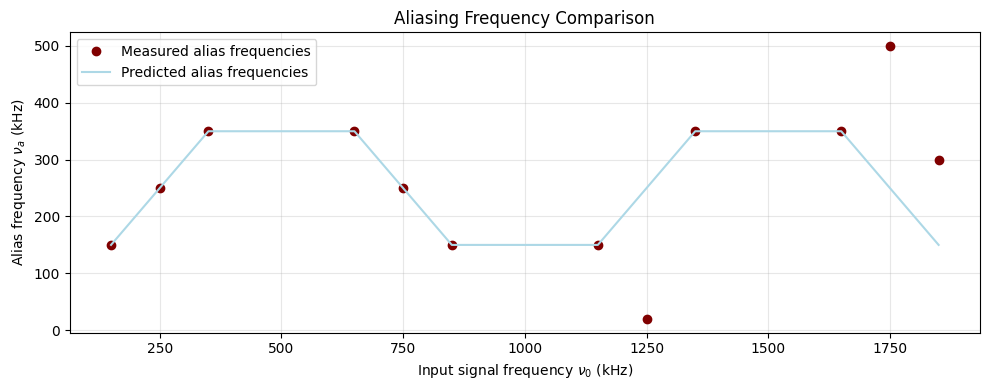

In [56]:
plt.figure(figsize=(10,4))
plt.plot(pk.f0s/1e3, pk.fmeas/1e3, "o", label="Measured alias frequencies", color = 'maroon')
plt.plot(pk.f0s/1e3, pk.fpreds/1e3, label="Predicted alias frequencies",color = 'lightblue' )
# plt.fill_between(pk.f0s/1e3,150,500)
# plt.fill_between(pk.fmeas/1e3, 150, alpha=0.2)
plt.xlabel("Input signal frequency $\\nu_0$ (kHz)")
plt.ylabel("Alias frequency $\\nu_a$ (kHz)")
plt.title("Aliasing Frequency Comparison")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Fig 3- Comparing the measured alias frequencies with theoretical predictions across multiple Nyquist zones. The alias frequencies measured in the digitized signal follow the expected folding behavior predicted by Nyquist sampling theory, particularly within the first two Nyquist zones. In these regions, the observed alias frequencies align well with theoretical predictions based on spectral mirroring about integer multiples of the Nyquist frequency. At higher input frequencies, several outliers are present, most notably at 1250 kHz, where the measured alias frequency is significantly suppressed. This behavior is consistent with attenuation from the SDR bandpass filter and reduced signal power at higher harmonics, as well as limitations introduced by finite time-domain sampling and frequency resolution. These effects can reduce the visibility or apparent frequency of aliased components without violating the underlying sampling theory.

<span style="font-size: 1.5em; color: maroon;">
Exploring the Bandpass Filter
</span>

Prior to this, the anti-aliasing bandpass filter has been bipassed/'turned off', by adding a command into the signal digitizing code that changes the finite impulse response (FIR) filter coefficients. In order to characterize the SDR bandpass filter, we need to analyze signals recieved both with and without the bandpass filter. In this part of the study, we intake a signal with the bandpass filter 'turned on', by removing the command that changes the FIR coefficients and digitizing a signal from the same signal generator.

Here, I compare two digitized signals that had already been collected while we were orienting ourselves with the data. The first signal, collected with the bandpass filter 'turned off', has an input signal frequency of 350kHz. The second signal, collected with the bandpass filter 'turned on', has an input frequency of 400kHz. Both were caputed with sample frequencies of 1000kHz.

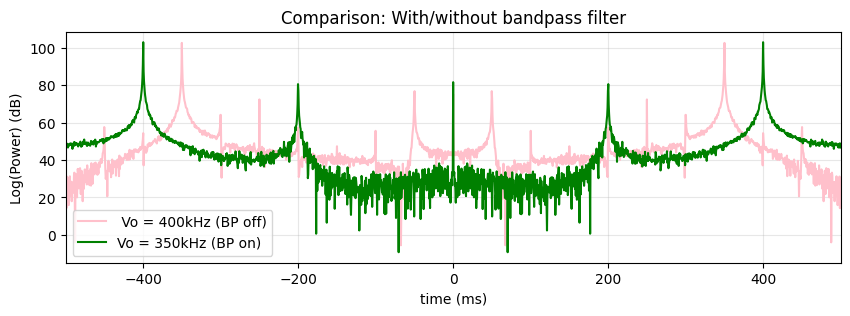

In [57]:
with np.load('Z0_350kHz.npz') as data: # No SDR (Vs = 1000kHz, Vo = 350kHz)
    arr1 = data['arr_0']
with np.load('data_1.0e6 (1).npz') as data: # SDR on (Vs = 1000kHz, Vo = 400kHz)
    arr2 = data['arr_0']

def time_axis(fs, N):
    return np.arange(N) / fs   # seconds
fs = 1e6

t_z01 = time_axis(fs, len(arr1[1])) * 1e3  # multiply by 1e3 for units of ms
t_z02 = time_axis(fs, len(arr2[1])) * 1e3

dt = 1/fs
N = 2048

f_z01=100e6
f_z02=100e6

X1 = np.fft.fft(arr1[1])
X1 = np.fft.fftshift(X1)
X2 = np.fft.fft(arr2[1])
X2= np.fft.fftshift(X2)

P1 = np.abs(X1)**2
P2 = np.abs(X2)**2

# Frequency
freq = np.fft.fftfreq(N, d=dt)
freq_shift = np.fft.fftshift(freq)

plt.figure(figsize=(10,3))
plt.plot(freq_shift/1e3,10*np.log10(P1), color = 'pink', label=" Vo = 400kHz (BP off)")
plt.plot(freq_shift/1e3, 10*np.log10(P2), color = 'green', label="Vo = 350kHz (BP on)")
plt.xlim(-500,500)
plt.xlabel("time (ms)")
plt.ylabel('Log(Power) (dB)')
plt.title("Comparison: With/without bandpass filter")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Fig. 4- Comparison of the power spectra for two digitized signals captured with and without the SDR anti-aliasing bandpass filter. The pink distribution shows a signal captured with the bandpass filter bypassed (it has input frequency = 400 kHz). The green distribution shows a signal acquired with the bandpass filter enabled (with input frequency = 350 kHz). Both signals were sampled at 1 MHz (1000kHz). 

With the bandpass filter disabled, the spectrum contains multiple harmonics distributed across the band, indicating aliasing. These harmonics are consistent with theory: for an input tone at frequency Vo, nonlinearities generate power at integer multiples, nVo.

When the bandpass filter is on, the spectrum is cleaner and any harmonics are suppressed which is consistent with the fact that the bandpass filter supresses the frequencies that come through. Here, there is a peak at 400kHz and an additional peak near 200kHz, which is consistent with spectral folding about the Nyquist frequency (Vo/2 = 500kHz).

Both spectra peak at their expected frequencies, demonstrating correct frequency placement by the digitizer.

<span style="font-size: 1.5em; color: maroon;">
Autocorrelation Functions and the Correlation Theorem
</span>

Autocorrelation functions (ACFs) were computed directly from the voltage time series using time-domain correlation and independently from the inverse Fourier transform of the power spectra. The correlation theorem predicts that these two approaches should yield equivalent results.

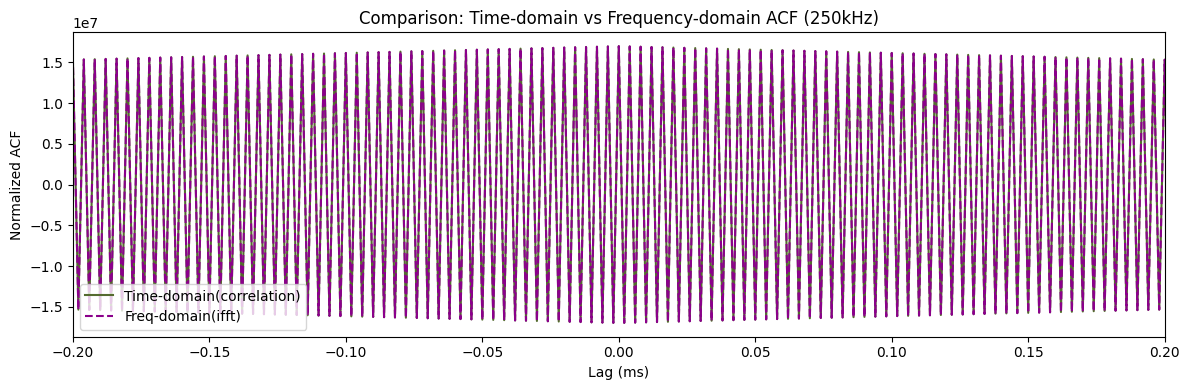

In [58]:
plt.figure(figsize=(12,4))
plt.plot(pk.lags_td*1e3, pk.acf_td, label="Time-domain(correlation)", color="darkolivegreen")
plt.plot(pk.lags_fd*1e3, pk.acf_fd, label="Freq-domain(ifft)", color="darkmagenta", linestyle="--")
plt.xlim(-.2, .2)
plt.xlabel("Lag (ms)")
plt.ylabel("Normalized ACF")
plt.title("Comparison: Time-domain vs Frequency-domain ACF (250kHz)")
plt.legend()
plt.tight_layout()
plt.show()


Fig 5- We can see that the inverse fourier transform of the power function and the time-domain ACF line up exactly. This proves that the inverse fourier transform is in fact a frequency domain ACF function. Both functions have the same shape, peaking directly in the middle where the lag = 0ms. This makes sense because this is where the ACF shows the best similarity to both functions.

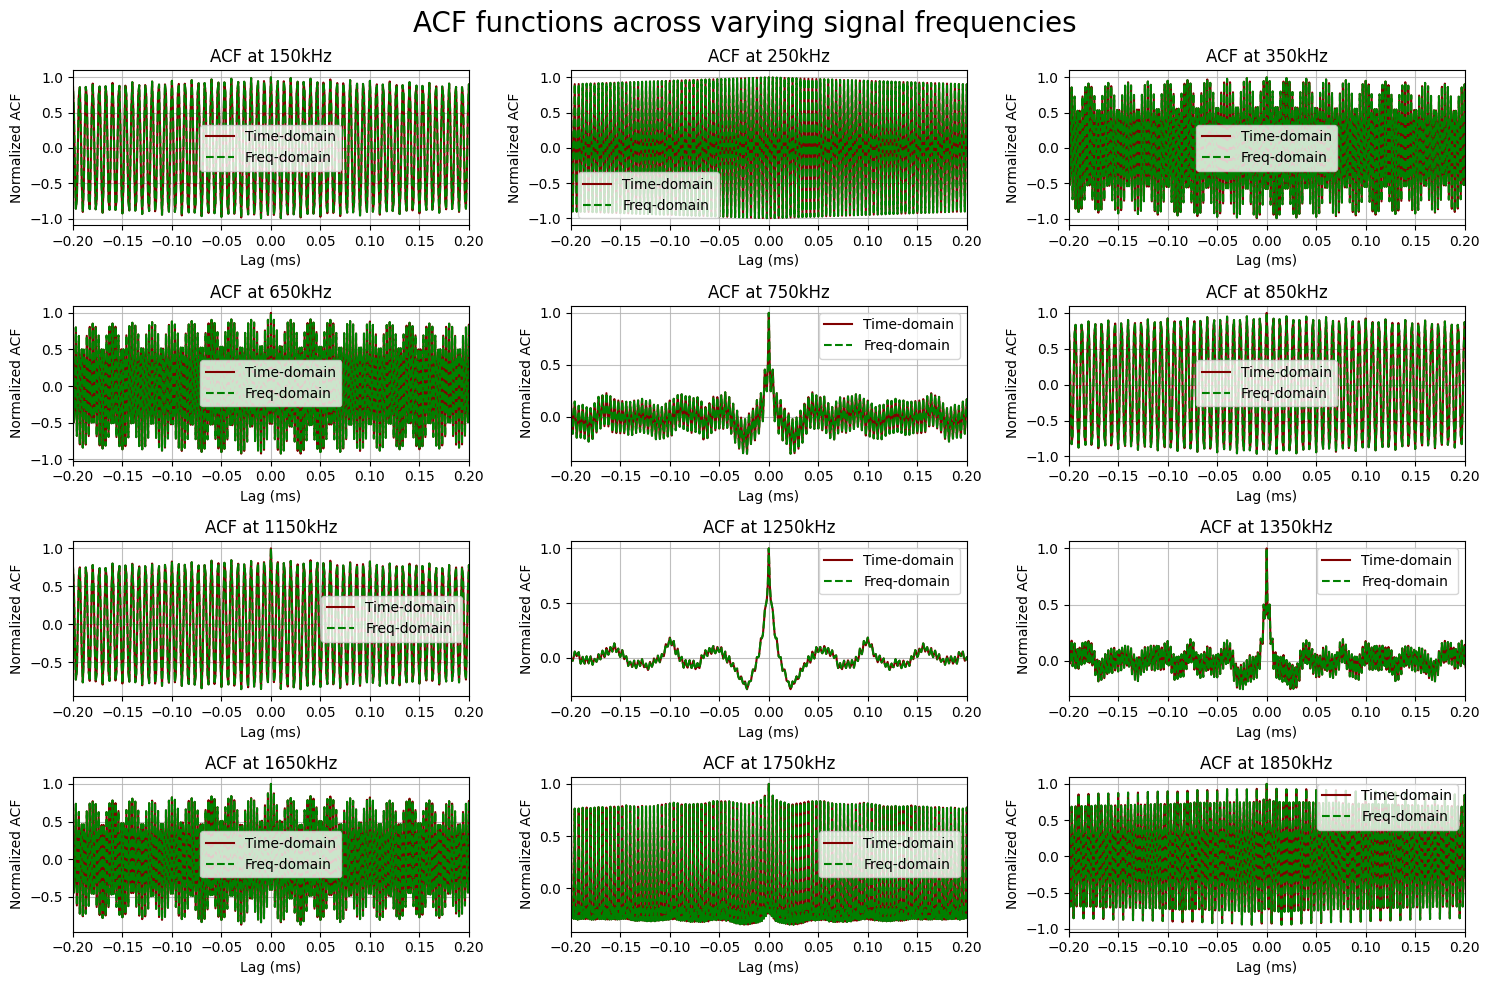

In [59]:
# Zone 0
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
colors = ["maroon", "green"]

#Zone 0
axs[0,0].plot(pk.lags_td1*1e3, pk.acf_td1, label="Time-domain", color=colors[0])
axs[0,0].plot(pk.lags_fd1*1e3, pk.acf_fd1, label="Freq-domain", color=colors[1], linestyle="--")
axs[0,0].set_title("ACF at 150kHz")

axs[0,1].plot(pk.lags_td2*1e3, pk.acf_td2, label="Time-domain", color=colors[0])
axs[0,1].plot(pk.lags_fd2*1e3, pk.acf_fd2, label="Freq-domain", color=colors[1], linestyle="--")
axs[0,1].set_title("ACF at 250kHz")

axs[0,2].plot(pk.lags_td3*1e3, pk.acf_td3, label="Time-domain", color=colors[0])
axs[0,2].plot(pk.lags_fd3*1e3, pk.acf_fd3, label="Freq-domain", color=colors[1], linestyle="--")
axs[0,2].set_title("ACF at 350kHz")

#Zone 1
axs[1,0].plot(pk.lags_td4*1e3, pk.acf_td4, label="Time-domain", color=colors[0])
axs[1,0].plot(pk.lags_fd4*1e3, pk.acf_fd4, label="Freq-domain", color=colors[1], linestyle="--")
axs[1,0].set_title("ACF at 650kHz")

axs[1,1].plot(pk.lags_td5*1e3, pk.acf_td5, label="Time-domain", color=colors[0])
axs[1,1].plot(pk.lags_fd5*1e3, pk.acf_fd5, label="Freq-domain", color=colors[1], linestyle="--")
axs[1,1].set_title("ACF at 750kHz")

axs[1,2].plot(pk.lags_td6*1e3, pk.acf_td6, label="Time-domain", color=colors[0])
axs[1,2].plot(pk.lags_fd6*1e3, pk.acf_fd6, label="Freq-domain", color=colors[1], linestyle="--")
axs[1,2].set_title("ACF at 850kHz")

#Zone 2
axs[2,0].plot(pk.lags_td7*1e3, pk.acf_td7, label="Time-domain", color=colors[0])
axs[2,0].plot(pk.lags_fd7*1e3, pk.acf_fd7, label="Freq-domain", color=colors[1], linestyle="--")
axs[2,0].set_title("ACF at 1150kHz")

axs[2,1].plot(pk.lags_td8*1e3, pk.acf_td8, label="Time-domain", color=colors[0])
axs[2,1].plot(pk.lags_fd8*1e3, pk.acf_fd8, label="Freq-domain", color=colors[1], linestyle="--")
axs[2,1].set_title("ACF at 1250kHz")

axs[2,2].plot(pk.lags_td9*1e3, pk.acf_td9, label="Time-domain", color=colors[0])
axs[2,2].plot(pk.lags_fd9*1e3, pk.acf_fd9, label="Freq-domain", color=colors[1], linestyle="--")
axs[2,2].set_title("ACF at 1350kHz")

#Zone 3
axs[3,0].plot(pk.lags_td10*1e3, pk.acf_td10, label="Time-domain", color=colors[0])
axs[3,0].plot(pk.lags_fd10*1e3, pk.acf_fd10, label="Freq-domain", color=colors[1], linestyle="--")
axs[3,0].set_title("ACF at 1650kHz")

axs[3,1].plot(pk.lags_td11*1e3, pk.acf_td11, label="Time-domain", color=colors[0])
axs[3,1].plot(pk.lags_fd11*1e3, pk.acf_fd11, label="Freq-domain", color=colors[1], linestyle="--")
axs[3,1].set_title("ACF at 1750kHz")

axs[3,2].plot(pk.lags_td12*1e3, pk.acf_td12, label="Time-domain", color=colors[0])
axs[3,2].plot(pk.lags_fd12*1e3, pk.acf_fd12, label="Freq-domain", color=colors[1], linestyle="--")
axs[3,2].set_title("ACF at 1850kHz")

for ax in axs.ravel():
    ax.set_xlabel("Lag (ms)")
    ax.set_ylabel("Normalized ACF")
    ax.set_xlim(-.2, .2)
    ax.legend()
    ax.grid(True, alpha=0.8)

fig.suptitle('ACF functions across varying signal frequencies', fontsize =20)
plt.tight_layout()

Fig. 6: This shows the ACF functions varying across input signal frequencies.
The unifying feature between most of these plots (with the exception of a few), is that it is a mostly-uniform diamond-shaped plot peaking in the middle, where the lag = 0ms. The closer the frequencies get to the foldover line, ( $\nu_s = 350, 650, 1650~\mathrm{kHz}$), the less the ACF values look.
There are three plots with very different looking data from the rest of the figure. These distributions are more similar to that of a sinc function. These frequencies that correspond to these plots, $\nu_s = 750, 1250, 1350~\mathrm{kHz}$), match up with the same frequencies that correspond to non-sinusoidal behavior in figure.

<span style="font-size: 1.5em; color: maroon;">
Spectral Leakage
</span>

Because the signals are observed over a finite time interval, their spectra exhibit leakage, with power distributed away from the central frequency. This effect arises from the convolution of the true signal spectrum with the Fourier transform of the finite time-domain window.

By computing power spectra on a finely sampled frequency grid and plotting the results on a logarithmic scale, low-level sidelobes surrounding the dominant frequency become apparent. While spectral leakage broadens the spectral peak, the location of the maximum power remains well defined, allowing accurate determination of the alias frequency despite finite sampling effects.


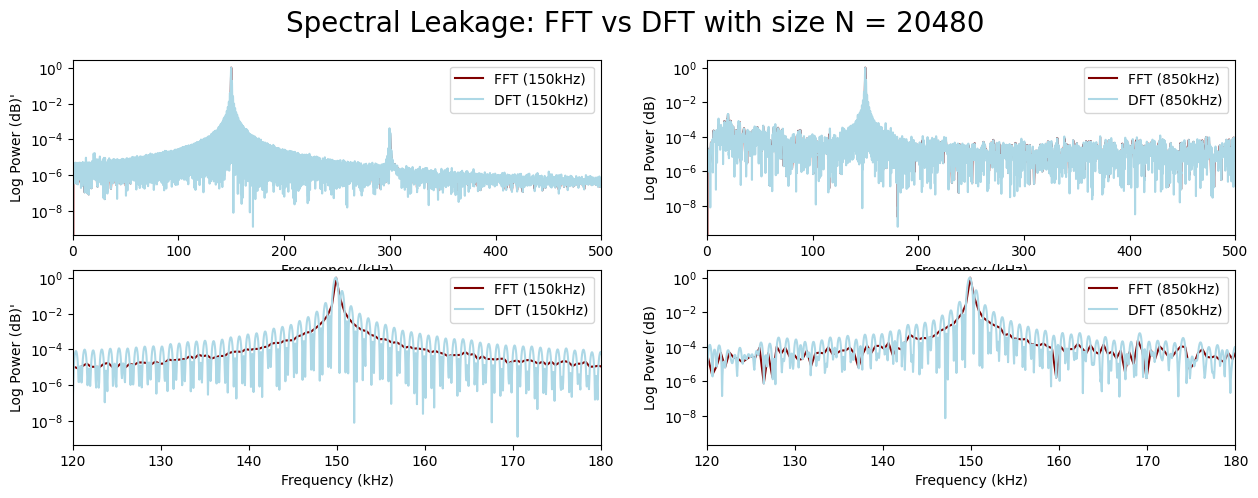

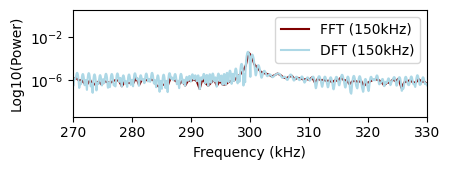

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(15, 5))

axs[0,0].semilogy(pk.f_fftshift/1e3, pk.P_fftshift1/np.max(pk.P_fftshift1), label="FFT (150kHz)", color ='maroon')
axs[0,0].semilogy(pk.f_out1/1e3, pk.P_dft1/np.max(pk.P_dft1), label="DFT (150kHz)", color = 'lightblue')
axs[0,0].set_xlim(0,500) #Symmetrical so plotting positive values
axs[0,0].set_xlabel("Frequency (kHz)")
axs[0,0].set_ylabel("Log Power (dB)'")
axs[0,0].legend()

axs[1,0].semilogy(pk.f_fftshift/1e3, pk.P_fftshift1/np.max(pk.P_fftshift1), label="FFT (150kHz)", color ='maroon')
axs[1,0].semilogy(pk.f_out1/1e3, pk.P_dft1/np.max(pk.P_dft1), label="DFT (150kHz)", color = 'lightblue')
axs[1,0].set_xlim(120,180)
axs[1,0].set_xlabel("Frequency (kHz)")
axs[1,0].set_ylabel("Log Power (dB)'")
axs[1,0].legend()

axs[0,1].semilogy(pk.f_fftshift/1e3, pk.P_fftshift6/np.max(pk.P_fftshift6), label="FFT (850kHz)", color ='maroon')
axs[0,1].semilogy(pk.f_out6/1e3, pk.P_dft6/np.max(pk.P_dft6), label="DFT (850kHz)", color = 'lightblue')
axs[0,1].set_xlim(0,500)
axs[0,1].set_xlabel("Frequency (kHz)")
axs[0,1].set_ylabel("Log Power (dB)")
axs[0,1].legend()

axs[1,1].semilogy(pk.f_fftshift/1e3, pk.P_fftshift6/np.max(pk.P_fftshift6), label="FFT (850kHz)", color ='maroon')
axs[1,1].semilogy(pk.f_out6/1e3, pk.P_dft6/np.max(pk.P_dft6), label="DFT (850kHz)", color = 'lightblue')
axs[1,1].set_xlim(120,180)
axs[1,1].set_xlabel("Frequency (kHz)")
axs[1,1].set_ylabel("Log Power (dB)")
axs[1,1].legend()

plt.figure(figsize=(4.6,1.8))
plt.semilogy(pk.f_fftshift/1e3, pk.P_fftshift1/np.max(pk.P_fftshift1), label="FFT (150kHz)", color ='maroon')
plt.semilogy(pk.f_out1/1e3, pk.P_dft1/np.max(pk.P_dft1), label="DFT (150kHz)", color = 'lightblue')
plt.xlim(270,330) #Symmetrical so plotting positive values
plt.xlabel("Frequency (kHz)")
plt.ylabel("Log10(Power)")
plt.legend()
plt.tight_layout()
fig.suptitle("Spectral Leakage: FFT vs DFT with size N = 20480", fontsize =20)
plt.tight_layout()

Fig. 7- Comparison of spectral leakage for input signal frequencies at 150kHz (Zone 0) and 850 kHz (Zone 1). The red line is the power spectrum calculate from a fast fourier transform (FFT) and the blue line is the power spectrum calculted from a discrete fourier transform(DFT). These are compared, in the figure, for each plots' respective frequency. The FFT and DFT distrubtions for both input frequencies peak at 150kHz which demonstrates, once again, the foldover that happens during aliasing.

The three plots on the left are the FFT/DFT spectra comparison for an input frequency of 150kHz. The plot on the top is a zoomed out version of the two plots directly below it. When looking at the top plot, the DFT distribution visually dominates and is more-or-less in the shape of a sinc function, with a high peak in the middle and decaying sides. The exception to this is an extra, smaller, peak at 300kHz which disrupts this distribution. There is a peak at 150kHz (which is to be expected since), and there is a harmonic at 300kHz. This is evidence of spectral leakage and matches up with theory, since 300kHz = 2 x 150kHz.
Zooming in further to the peak around 150kHz DFT function pretty uniform and sinc-like. The FFT

The two plots on the right are the FFT/DFT spectra comparison for an input frequency of 650kHz. Once again, the plot on the top is a zoomed out version of the one on the bottom. The visually dominating DFT spectra is also in the shape of a sinc function and when zoomed looks to be that way.

The DFT spectrum is in the form of a sinc function, with a high peak in the middle and decaying sides. In contrast, the FFT samples who the severity of spectral leakage 

Although both distributions peak at 150kHz (which is the alias frequency for both input signals), the FFT spectrum for the 850kHz signal appears to be much more jagged. Based on what we know about frequencies that are closer to the foldover points(see fig. 5), we can say that this jaggedness doesn't reflect increased noise/signal variability. Instead, it points toward worse alignment between the aliased frequency and the FFT grid.

<span style="font-size: 1.5em; color: maroon;">
Frequency Resolution
</span>

In this part of the study, we investigate the frequency resolution of the fourier transform. In other words, we are measuring to what extent the fast fourier transform function (FFT) can distinguish between two signal frequencies that are very close together. This limitation is set by the discrete frequency bins of the FFT, whose spacing is given by $\Delta\nu$ =$\nu_{\mathrm{s}}/N$. Because each FFT bin represents a frequency interval that is finite, two signals separated by less than the bin width may appear as a single peak in the power spectrum. Frequency resolution therefore provides a fundamental limit on how precisely individual frequency components can be identified in sampled data.

We combined sinusoidal signals with small frequency separations and analyzed using the FFT. By decreasing the separation between the tones and varying the number of samples, we directly tested the conditions under which two frequencies can be seen as distinct peaks.

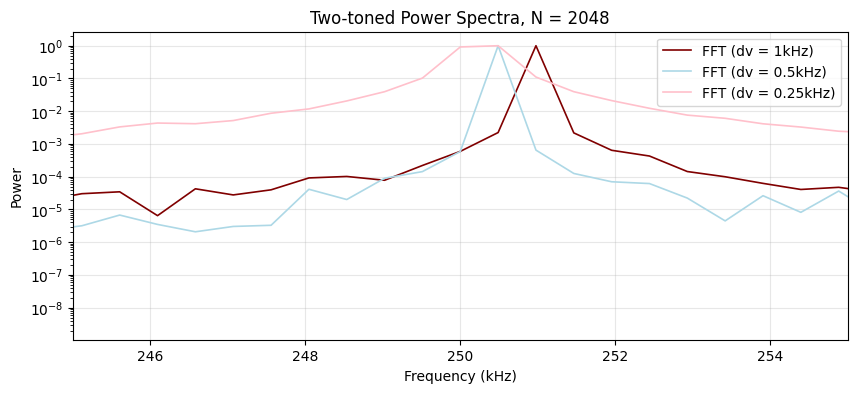

In [61]:
'''Frequency Resolution (5.6)'''

# The first signal generator is always default 250kHz
# The second signal generator is 250kHz + dv (i.e. if dv = 1, then v_2 = 251kHz)

with np.load('L5.6_250kHz.npz') as data: #dv = 1kHz 
    dv_1kHz = data['arr_0']   
with np.load('L5.6_250kHz_Closerrr.npz') as data: #dv = 0.25kHz
    dv_025kHz = data['arr_0']
with np.load('L5.6_250kHz_Closer.npz') as data: #dv = 0.5kHz
    dv_05kHz = data['arr_0']
    
#values stay constant
fs = 1e6
dt = 1/fs

N = len(dv_1kHz[1])
t = np.arange(N) * dt 

# FFT grid
f_fft = np.fft.fftfreq(N, d=dt)
f_fftshift = np.fft.fftshift(f_fft)

x1 = dv_1kHz[1] - np.mean(dv_1kHz[1])
x3 = dv_025kHz[1] - np.mean(dv_025kHz[1])
x4 = dv_05kHz[1] - np.mean(dv_05kHz[1])

X_fft1 = np.fft.fft(x1)
X_fftshift1 = np.fft.fftshift(X_fft1)
P_fft1 = np.abs(X_fftshift1)**2
P_fft1 = P_fft1 / np.max(P_fft1)

X_fft3 = np.fft.fft(x3)
X_fftshift3 = np.fft.fftshift(X_fft3)
P_fft3 = np.abs(X_fftshift3)**2
P_fft3 = P_fft3 / np.max(P_fft3)

X_fft4 = np.fft.fft(x4)
X_fftshift4 = np.fft.fftshift(X_fft4)
P_fft4 = np.abs(X_fftshift4)**2
P_fft4 = P_fft4 / np.max(P_fft4)

plt.figure(figsize=(10,4))
# plt.plot(f_out/1e3, P_dft, alpha=0.4, label="fine-grid DFT")
plt.plot(f_fftshift/1e3, P_fft1, color="maroon", linewidth=1.2, label="FFT (dv = 1kHz)")
plt.plot(f_fftshift/1e3, P_fft4, color="lightblue", linewidth=1.2, label="FFT (dv = 0.5kHz)")
plt.plot(f_fftshift/1e3, P_fft3, color="pink", linewidth=1.2, label="FFT (dv = 0.25kHz)")

plt.yscale("log")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Power")
plt.title(f"Two-toned Power Spectra, N = 2048")
plt.xlim(245, 255)   # change this to zoom in if needed
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Fig. 8- Zoomed-in two-toned Power Spectra compared across varying decreasing frequency separations of $\Delta\nu$ = 1 kHz, 0.5 kHz, and 0.25 kHzwith a fixed sample size of N = 2048. 

Each distribution peaks at around 250kHz. The red line represents a frequency separation of 1kHz and is sharply peaked at 251, where the second signal generator's input frequency was set.
This trend follows with the blue line, which represents a frequency separation of 0.5kHz and a sharp peak at 250.25. As the separation between the two tones decreases past $\Delta\nu$ = 0.5kHz, the peaks become difficult to distinguish. For $\Delta\nu$ =  0.25kHz, the signals begin to merge into a single broadened peak. This demonstrates the practical frequency-resolution limit imposed by the FFT bin width.

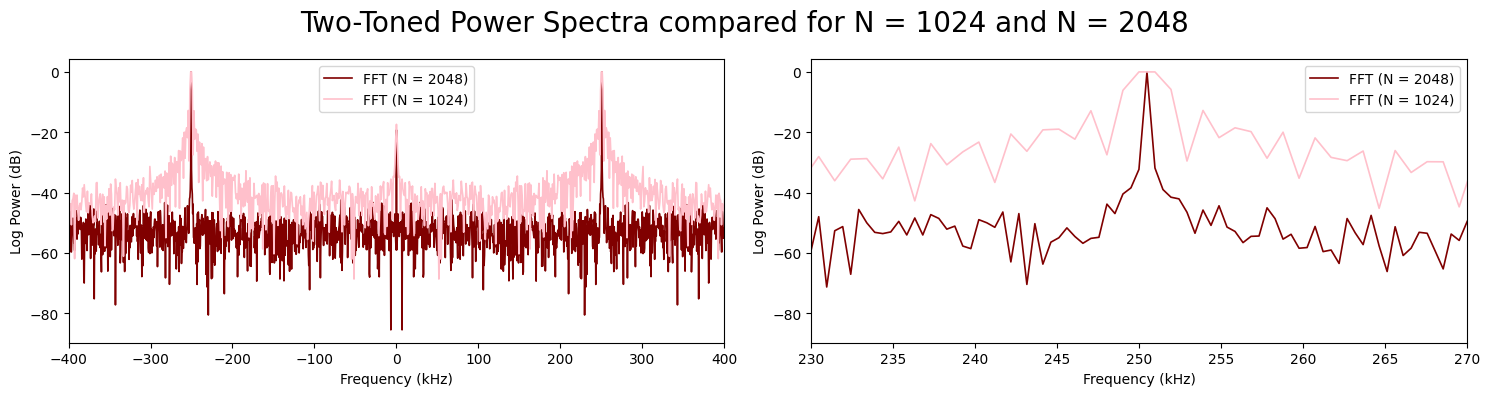

In [62]:
with np.load('L5.6_250kHz_Closer.npz') as data1: 
    dv_05_2048 = data1['arr_0']
with np.load('L5.6_250kHz_Closer_1024N.npz') as data2:
    dv_05_1024 = data2['arr_0']

#values stay constant
fs = 1e6
dt = 1/fs

N1 = len(dv_05_2048[1])
t1 = np.arange(N1) * dt 

N2 = len(dv_05_1024[1])
t2 = np.arange(N2) * dt 

# FFT grid
f_fft1 = np.fft.fftfreq(N1, d=dt)
f_fftshift1 = np.fft.fftshift(f_fft1)

f_fft2 = np.fft.fftfreq(N2, d=dt)
f_fftshift2 = np.fft.fftshift(f_fft2)

x1 = dv_05_2048[1] #- np.mean(dv_05_2048[1])
x2 = dv_05_1024[1] #- np.mean(dv_05_1024[1])

X_fft1 = np.fft.fft(x1)
X_fftshift1 = np.fft.fftshift(X_fft1)
P_fft1 = np.abs(X_fftshift1)**2
P_fft1 = P_fft1 / np.max(P_fft1)

X_fft2 = np.fft.fft(x2)
X_fftshift2 = np.fft.fftshift(X_fft2)
P_fft2 = np.abs(X_fftshift2)**2
P_fft2 = P_fft2 / np.max(P_fft2)

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].plot(f_fftshift1/1e3, 10*np.log10(P_fft1), color="maroon", linewidth=1.2, label="FFT (N = 2048)")
axs[0].plot(f_fftshift2/1e3, 10*np.log10(P_fft2), color="pink", linewidth=1.2, label="FFT (N = 1024)")
axs[0].set_xlabel("Frequency (kHz)")
axs[0].set_ylabel("Log Power (dB)")
axs[0].set_xlim(-400,400)
axs[0].legend()

axs[1].plot(f_fftshift1/1e3, 10*np.log10(P_fft1), color="maroon", linewidth=1.2, label="FFT (N = 2048)")
axs[1].plot(f_fftshift2/1e3, 10*np.log10(P_fft2), color="pink", linewidth=1.2, label="FFT (N = 1024)")
axs[1].set_xlabel("Frequency (kHz)")
axs[1].set_ylabel("Log Power (dB)")
axs[1].set_xlim(230,270)
axs[1].legend()

plt.xlabel("Frequency (kHz)")
plt.ylabel("Log Power (dB)")
plt.legend()
plt.tight_layout()
fig.suptitle("Two-Toned Power Spectra compared for N = 1024 and N = 2048", fontsize =20)
plt.tight_layout()


Fig. 9- Comparison of a two-tone power spectra for a fixed frequency separation of $\Delta\nu$ = 0.5 kHz, comparing FFT lengths of N=2048 and N=1024. The left panel shows the full frequency range, while the right panel zooms in on the region around the 250 kHz tones. 

Theoretically, an increase in the number of samples, N, reduces the FFT bin spacing, allowing the two tones to be more clearly distinguished, and hence pointing to a better frequency resolution. This plot lines up with theory as the red line representing a sample size of N = 2048 has a sharp peak right at 250kHz, where pink line, representing the distribution from sample size of N = 1024 broadly peaks over a few frequencies around 250kHz.

<span style="font-size: 1.5em; color: maroon;">
Noise and the Radiometer equation
</span>

The radiometer equation measures uncertainty in noise power.

which predicts that the rms fluctuation in measured power decreases with integration time and bandwidth as $\sigma \propto 1/\sqrt{\Delta \nu \, t}$. Equivalently, when averaging independent measurements, the noise fluctuations are expected to decrease as $1/\sqrt{N}$. This relationship provides a direct experimental test of whether the measured noise behaves according to Gaussian statistics.

In [63]:
import numpy as np
import matplotlib.pyplot as plt

noise = np.load("noise_3000000Hz_16blocks.npz")
data = noise["data"]                 # shape (nblocks, Nsamp)
fs = float(noise["sample_rate"])
nblocks = int(noise["nblocks"])

N = data.shape[1]
dt = 1/fs

freq = np.fft.fftfreq(N, d=dt)
f = np.fft.fftshift(freq)

P0 = np.abs(np.fft.fftshift(np.fft.fft(data[0]  - np.mean(data[0]))))**2
P1 = np.abs(np.fft.fftshift(np.fft.fft(data[1]  - np.mean(data[1]))))**2
P2 = np.abs(np.fft.fftshift(np.fft.fft(data[2]  - np.mean(data[2]))))**2
P3 = np.abs(np.fft.fftshift(np.fft.fft(data[3]  - np.mean(data[3]))))**2
P4 = np.abs(np.fft.fftshift(np.fft.fft(data[4]  - np.mean(data[4]))))**2
P5 = np.abs(np.fft.fftshift(np.fft.fft(data[5]  - np.mean(data[5]))))**2
P6 = np.abs(np.fft.fftshift(np.fft.fft(data[6]  - np.mean(data[6]))))**2
P7 = np.abs(np.fft.fftshift(np.fft.fft(data[7]  - np.mean(data[7]))))**2
P8 = np.abs(np.fft.fftshift(np.fft.fft(data[8]  - np.mean(data[8]))))**2
P9 = np.abs(np.fft.fftshift(np.fft.fft(data[9]  - np.mean(data[9]))))**2
P10 = np.abs(np.fft.fftshift(np.fft.fft(data[10] - np.mean(data[10]))))**2
P11 = np.abs(np.fft.fftshift(np.fft.fft(data[11] - np.mean(data[11]))))**2
P12 = np.abs(np.fft.fftshift(np.fft.fft(data[12] - np.mean(data[12]))))**2
P13 = np.abs(np.fft.fftshift(np.fft.fft(data[13] - np.mean(data[13]))))**2
P14 = np.abs(np.fft.fftshift(np.fft.fft(data[14] - np.mean(data[14]))))**2
P15 = np.abs(np.fft.fftshift(np.fft.fft(data[15] - np.mean(data[15]))))**2


band = (np.abs(f) > 50e3) & (np.abs(f) < 1.2e6)

med0 = np.median(P0[band])   # normalize everything to block 0 median (in-band)

Pavg2  = (P0 + P1) / 2.0
Pavg4  = (P0 + P1 + P2 + P3) / 4.0
Pavg8  = (P0 + P1 + P2 + P3 + P4 + P5 + P6 + P7) / 8.0
Pavg16 = (P0 + P1 + P2 + P3 + P4 + P5 + P6 + P7 +
          P8 + P9 + P10 + P11 + P12 + P13 + P14 + P15) / 16.0

/var/folders/r6/3p0vv0ms2kzbsgml1_p2ftjm0000gn/T/ipykernel_70817/479709039.py:3: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(f/1e3, 10*np.log10(P0),  color="maroon", linewidth=1.0, label="1 block")
/var/folders/r6/3p0vv0ms2kzbsgml1_p2ftjm0000gn/T/ipykernel_70817/479709039.py:8: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(f/1e3, 10*np.log10(Pavg2), color="darkgreen",  linewidth=1.0, alpha=0.9, label="avg of 2 blocks")
/var/folders/r6/3p0vv0ms2kzbsgml1_p2ftjm0000gn/T/ipykernel_70817/479709039.py:13: RuntimeWarning: divide by zero encountered in log10
  axs[2].plot(f/1e3, 10*np.log10(Pavg4),  color="pink", linewidth=1.0, alpha=0.9, label="avg of 4 blocks")
/var/folders/r6/3p0vv0ms2kzbsgml1_p2ftjm0000gn/T/ipykernel_70817/479709039.py:18: RuntimeWarning: divide by zero encountered in log10
  axs[3].plot(f/1e3, 10*np.log10(Pavg8), color="teal",  linewidth=1.0, alpha=0.9, label="avg of 8 blocks")
/var/folders/r6/3p0vv0ms2kzbsgml1_p2ftjm0000gn/T/ipyk

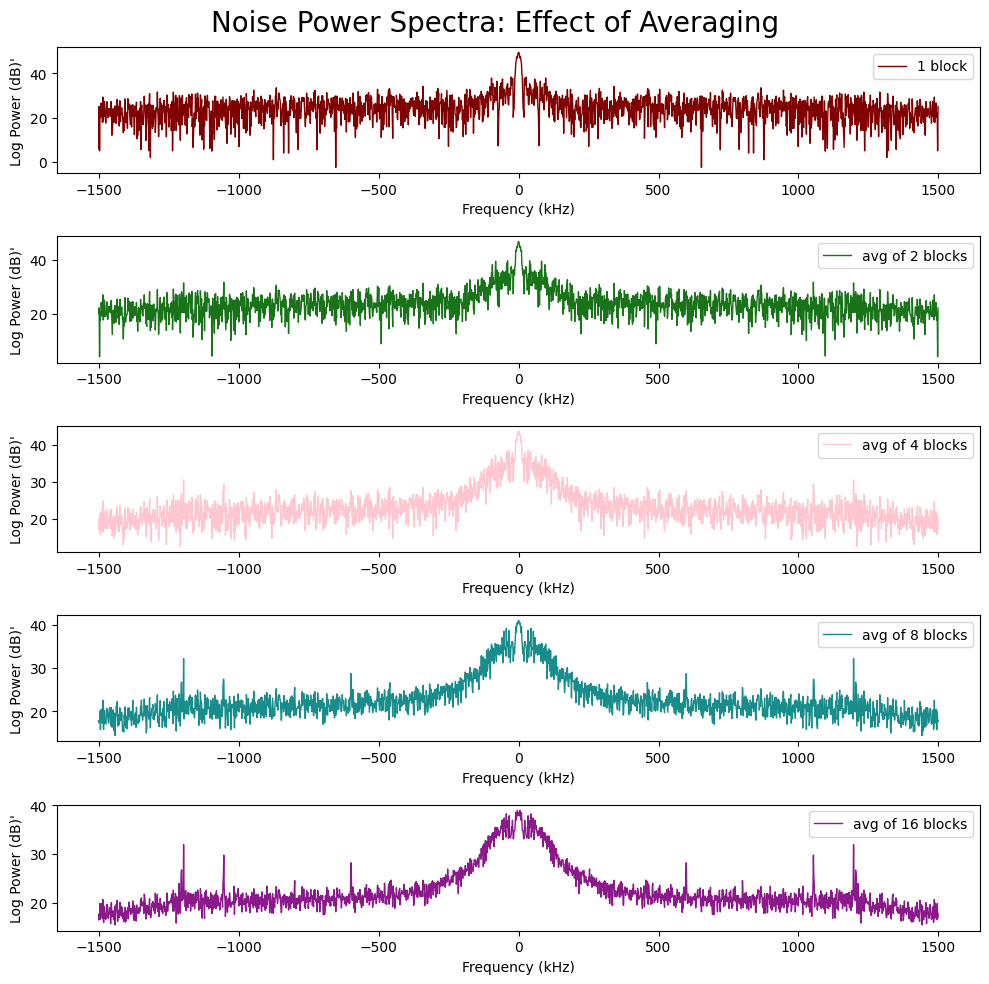

In [64]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10))

axs[0].plot(f/1e3, 10*np.log10(P0),  color="maroon", linewidth=1.0, label="1 block")
axs[0].set_xlabel("Frequency (kHz)")
axs[0].set_ylabel("Log Power (dB)'")
axs[0].legend()

axs[1].plot(f/1e3, 10*np.log10(Pavg2), color="darkgreen",  linewidth=1.0, alpha=0.9, label="avg of 2 blocks")
axs[1].set_xlabel("Frequency (kHz)")
axs[1].set_ylabel("Log Power (dB)'")
axs[1].legend()

axs[2].plot(f/1e3, 10*np.log10(Pavg4),  color="pink", linewidth=1.0, alpha=0.9, label="avg of 4 blocks")
axs[2].set_xlabel("Frequency (kHz)")
axs[2].set_ylabel("Log Power (dB)'")
axs[2].legend()

axs[3].plot(f/1e3, 10*np.log10(Pavg8), color="teal",  linewidth=1.0, alpha=0.9, label="avg of 8 blocks")
axs[3].set_xlabel("Frequency (kHz)")
axs[3].set_ylabel("Log Power (dB)'")
axs[3].legend()

axs[4].plot(f/1e3, 10*np.log10(Pavg16), color="purple", linewidth=1.0, alpha=0.9, label="avg of 16 blocks")
axs[4].set_xlabel("Frequency (kHz)")
axs[4].set_ylabel("Log Power (dB)'")
axs[4].legend()

fig.suptitle("Noise Power Spectra: Effect of Averaging", fontsize =20)
fig.tight_layout()

Fig. 10- Normalized noise power spectra obtained by averaging an increasing number of independent data blocks (1, 2, 4, 8, and 16 blocks). As then number of blocks increases (and more spectra are averaged together), the fluctuations (noise) are reduced which then produces a smoother power spectrum. 

This reflects the statistical reduction of variance expected. The observed decrease in spectral fluctuations is consistent with the radiometer equation, which predicts that noise fluctuations scale approximately as 
$1/\sqrt{N}$ for N averaged measurements. This confirms that the noise generator that we used is, in fact, described by thermal noise. It also shows that spectral averaging improves the ratio of signal to noise.

## Experiment 2: Methods

In the second part of this study, we explore heterodyne mixing to better understand signal processing of high radio frequencies. In radioastronomy, signal frequencies are often very high and often a digital converter can not intake data at high frequencies. A heterodyne mixer multiplies the signal by a local oscillator (a know, local sine wave) and it shifts the spectrum down to a lower frequency. Here, we build two types of mixers, a double side band (DSB) mixer and a single sideband (SSB) mixer. 

The DSB mixer was built using two signal generators, one assigned as the LO and the other assigned to be the RF. We took samples of two different LO/RF frequency configurations. For the first configuration, we set the RF at 1575kHZ and the LO at 1500kHz in order to produce a low frequency of 75kHz (the sample rate was set at 1MHz (1000kHz)). For the second configuration, we wanted to product a higher frequency of 500kHz, so we set the RF to 1500kHz and the LO to 1000kHz. To stay within the nyquist criterion, we had to increase the sample rate to 2MHz (2000kHz). For each configuration, data was saved for offline analysis.

The SSB mixer was built using two DSB mixers, following the I/Q architecture. We used a long cable which caused one of the LO paths to be delayed in phase by approximately 90°. The in-phase (I) and quadrature (Q) outputs were recorded and digitized for data analysis.

All subsequent data processing and visualization were performed using custom Python scripts and functions developed for this project.

## Experiment 2: Data

<span style="font-size: 1.5em; color: maroon;">
Operation and importance of DSB mixers
</span>

/var/folders/r6/3p0vv0ms2kzbsgml1_p2ftjm0000gn/T/ipykernel_70817/1956427662.py:33: RuntimeWarning: divide by zero encountered in log10
  plt.plot(fshift2/1e3, 10*np.log10(P2), label='RF=1500kHz, LO=1000kHz', color='green')


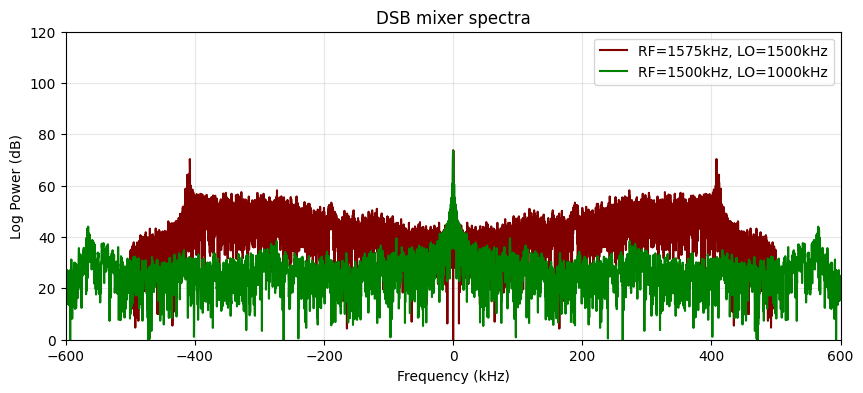

In [65]:
#configuration 1
data1 = np.load('run-sig1575kHz_1500kHz-sample1.0MHz-22mVpp.npz')
x1 = np.ravel(data1['data_direct'][0]).astype(float)
x1 = x1 - np.mean(x1)

fs1 = float(data1['sample_rate_mhz']) * 1e6
dt1 = 1.0 / fs1
N1 = x1.size

f1 = np.fft.fftfreq(N1, d=dt1)
X1 = np.fft.fft(x1)
fshift1 = np.fft.fftshift(f1)
Xshift1 = np.fft.fftshift(X1)
P1 = np.abs(Xshift1)**2

# configuration 2
data2 = np.load('run-sig1500kHz_1000kHz-sample2.0MHz-22mVpp.npz')
x2 = np.ravel(data2['data_direct'][0]).astype(float)
x2 = x2 - np.mean(x2)

fs2 = float(data2['sample_rate_mhz']) * 1e6
dt2 = 1.0 / fs2
N2 = x2.size

f2 = np.fft.fftfreq(N2, d=dt2)
X2 = np.fft.fft(x2)
fshift2 = np.fft.fftshift(f2)
Xshift2 = np.fft.fftshift(X2)
P2 = np.abs(Xshift2)**2

plt.figure(figsize=(10,4))
plt.plot(fshift1/1e3, 10*np.log10(P1), label='RF=1575kHz, LO=1500kHz', color='maroon')
plt.plot(fshift2/1e3, 10*np.log10(P2), label='RF=1500kHz, LO=1000kHz', color='green')
plt.xlim(-600, 600) 
plt.ylim(0,120)
plt.xlabel('Frequency (kHz)') # not normalized
plt.ylabel('Log Power (dB)')
plt.title('DSB mixer spectra')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Fig. 11 is the power spectra of two different DSB mixer configurations. The first configuration, in red has a $\nu_{\mathrm{RF}}$ = 1575kHz and a $\nu_{\mathrm{LO}}$ = 1500kHz. This should, in theory, yield a lower side-band IF frequency of $\Delta\nu$ = 75kHz. There is no obvious peak at $\pm$ 75kHz and there appears to be a rounded peak at around 400kHz. The second configuration, shown in green has a $\nu_{\mathrm{RF}}$ = 1500kHz and a $\nu_{\mathrm{LO}}$ = 1000kHz. This should, in theory, yield a lower side-band IF frequency of $\Delta\nu$ = 500kHz. Instead, there are peaks at around $\pm$ ~575kHz.

Additionally, for a DSB mixer, there should also upper side-band peaks that correspond to sum of the RF and LO frequencies. For configuration 1, this should be $\Delta\nu$ = 3075kHz. For configuration 2, this should be $\Delta\nu$ = 2500kHz. Both of these frequencies exceed the nyquist limit and would therefore theoretically alias into the lower side-band.

I am not sure why the frequencies that these distributions peak at do not line up with theory, but I am going to guess, since the peaks are not very sharp, that this may be attributed to a mechanical error (we have already run into quite a few data collection issues because of the limitations of the signal generators at high frequencies). It could also be a plotting error as the  datasets looked quite different from the ones we were using before.

<span style="font-size: 1.5em; color: maroon;">
Operation and importance of SSB mixers
</span>

In [1]:
file = "run-42500kHz-1.0MHz (1).npz"
data = np.load(file)
print(data.files)

fs = float(data["sample_rate_mhz"]) * 1e6
dt = 1/fs

I = np.ravel(data["data_direct"][0]).astype(float)
Q = np.ravel(data["data_direct"][1]).astype(float)

z = I + 1j*Q
N = z.size
t = np.arange(N) * dt

# fft of signal
f = np.fft.fftfreq(N, d=dt)
Z = np.fft.fft(z)
idx = np.argmax(np.abs(Z))   # strongest tone
f0 = f[idx]

fshift = np.fft.fftshift(f)
Zshift = np.fft.fftshift(Z)
P = np.abs(Zshift)**2

FI_all = np.fft.fftshift(np.fft.fft(I))
PI = np.abs(FI_all)**2
# PI /= np.max(PI)

plt.figure(figsize=(10,4))
plt.plot(fshift/1e3, P, label="Complex spectrum",color='green')
plt.plot(fshift/1e3, PI, label="Real-only spectrum",color='lightblue', linestyle = '--')
plt.yscale("log")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Power (normalized)")
plt.xlim(-200,200)
plt.legend()
plt.grid(True, alpha=0.3)
plt.title("Real vs Complex Power spectrum")
plt.show()

print(data.files)
print(data["data_direct"].shape)

NameError: name 'np' is not defined

Fig. 12- Power spectra comparing real-only (I) and complex (I + iQ) representations of the mixer output for the SSB configuration. The real-only spectrum (light blue), computed using only the in-phase component, is symmetric about zero frequency and therefore cannot distinguish between positive and negative frequency offsets. In contrast, the complex spectrum (green), formed from the in-phase (I) and quadrature (Q) components, is asymmetric and preserves the sign of the frequency offset. This allows positive and negative intermediate frequencies to be distinguished, demonstrating the single-sideband behavior of the SSB mixer. The strong suppression of one sideband in the complex spectrum highlights the effectiveness of quadrature mixing in separating upper and lower sidebands.